In [3]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import timeit
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#Loading Data set
df = pd.read_csv("/content/drive/My Drive/ECE659/kddcup.data.corrected")

In [5]:
# Loading Dataset from local host 
data_kdd = pd.read_csv("~/Documents/Uwaterloo_Study_Docs/659_ECE/Research_Project/Datasets/DATASET/KDD_CUP_1999/corrected")
print("DATA: \n", data_kdd)

DATA: 
        0  udp  private  SF  105  146  0.1  0.2  0.3  0.4  ...  254  1.00.1  \
0       0  udp  private  SF  105  146    0    0    0    0  ...  254     1.0   
1       0  udp  private  SF  105  146    0    0    0    0  ...  254     1.0   
2       0  udp  private  SF  105  146    0    0    0    0  ...  254     1.0   
3       0  udp  private  SF  105  146    0    0    0    0  ...  254     1.0   
4       0  udp  private  SF  105  146    0    0    0    0  ...  255     1.0   
...    ..  ...      ...  ..  ...  ...  ...  ...  ...  ...  ...  ...     ...   
311023  0  udp  private  SF  105  147    0    0    0    0  ...  255     1.0   
311024  0  udp  private  SF  105  147    0    0    0    0  ...  255     1.0   
311025  0  udp  private  SF  105  147    0    0    0    0  ...  255     1.0   
311026  0  udp  private  SF  105  147    0    0    0    0  ...  255     1.0   
311027  0  udp  private  SF  105  147    0    0    0    0  ...  255     1.0   

        0.01  0.00.6  0.00.7  0.00.8  0.00.9

In [7]:
data_kdd.iloc[:,41].unique()

array(['normal.', 'snmpgetattack.', 'named.', 'xlock.', 'smurf.',
       'ipsweep.', 'multihop.', 'xsnoop.', 'sendmail.', 'guess_passwd.',
       'saint.', 'buffer_overflow.', 'portsweep.', 'pod.', 'apache2.',
       'phf.', 'udpstorm.', 'warezmaster.', 'perl.', 'satan.', 'xterm.',
       'mscan.', 'processtable.', 'ps.', 'nmap.', 'rootkit.', 'neptune.',
       'loadmodule.', 'imap.', 'back.', 'httptunnel.', 'worm.',
       'mailbomb.', 'ftp_write.', 'teardrop.', 'land.', 'sqlattack.',
       'snmpguess.'], dtype=object)

In [9]:
col=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
  'logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
  'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
  'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
  'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
  'dst_host_rerror_rate','dst_host_srv_rerror_rate','target']
data_kdd.columns=col
data_kdd.head(20)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00,snmpgetattack.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.01,0.00,0.00,0.0,0.00,0.00,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.00,0.0,0.00,0.00,snmpgetattack.
5,0,udp,domain_u,SF,29,0,0,0,0,0,...,3,0.30,0.30,0.30,0.00,0.00,0.0,0.00,0.00,normal.
6,0,udp,private,SF,105,146,0,0,0,0,...,253,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal.
7,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00,snmpgetattack.
8,0,tcp,http,SF,223,185,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,normal.
9,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00,snmpgetattack.


In [0]:
from sklearn import preprocessing
#protocol_type
protocol_type = preprocessing.LabelEncoder()
protocol_type.fit(df['protocol_type'])
df['protocol_type']=protocol_type.transform(df['protocol_type'])
#service
service = preprocessing.LabelEncoder()
service.fit(df['service'])
df['service']=service.transform(df['service'])
# flag
service = preprocessing.LabelEncoder()
service.fit(df['flag'])
df['flag']=service.transform(df['flag'])
# target
service = preprocessing.LabelEncoder()
service.fit(df['target'])
df['target']=service.transform(df['target'])

In [7]:
df.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,1,24,9,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,11
1,0,1,24,9,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,11
2,0,1,24,9,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,11
3,0,1,24,9,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,11
4,0,1,24,9,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,11


In [8]:
df.shape

(4898430, 42)

In [0]:
D=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
  'logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
  'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
  'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
  'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
  'dst_host_rerror_rate','dst_host_srv_rerror_rate']
X=df[D]
y=df['target']

In [0]:
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran) 

In [11]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=5,max_depth=None,random_state=42)
RFC.fit(X_train,y_train.values.ravel())
pred_RFC=RFC.predict(X_test)
RFC_accuracy_store=accuracy_score(y_test.values.ravel(),pred_RFC)
RFC_accuracy_store

0.9999356936814449

In [12]:
from sklearn.model_selection import cross_val_score
tree=[10,5]
depth=[3,5,10,0]
store_val=np.ndarray(shape=(5,4),dtype=float)
for coun_t,value_t in enumerate(tree):
    #print(coun_t,value_t)
    for coun_d,value_d in enumerate(depth):
        if value_d==0:
            rf=RandomForestClassifier(n_estimators=value_t,max_depth=None,random_state=42)
        else:
            rf=RandomForestClassifier(n_estimators=value_t,max_depth=value_d,random_state=42)
        score=cross_val_score(rf, X, y.values.ravel(), cv=10)
        store_val[coun_t][coun_d]=np.mean(score)
        #print(np.mean(score))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

In [0]:
arr=pd.DataFrame(store_val,columns=['3','5','10','None'],index=['200','150','50','10','5'])

In [16]:
arr

,3,5,10,None
200,9.912505e-01,9.969823e-01,9.992689e-01,9.994421e-01
150,9.896844e-01,9.966912e-01,9.991005e-01,9.994478e-01
50,3.952525e-323,4.446591e-323,1.630417e-322,1.679823e-322
10,1.729230e-322,1.778636e-322,1.828043e-322,1.877449e-322
5,1.926856e-322,1.976263e-322,2.025669e-322,2.075076e-322


(5.5, -0.5)

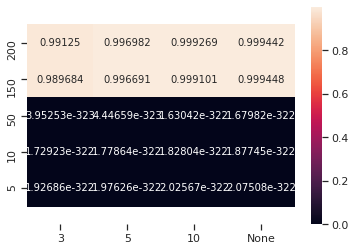

In [14]:
ax=sns.heatmap(arr,annot=True,fmt='g')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Feature list
1.   duration: continuous.
2. protocol_type: symbolic.
3. service: symbolic.
4. flag: symbolic.
5. src_bytes: continuous.
6. dst_bytes: continuous.
7. land: symbolic.
8. wrong_fragment: continuous.
9. urgent: continuous.
10. hot: continuous.
11. num_failed_logins: continuous.
12. logged_in: symbolic.
13. num_compromised: continuous.
14. root_shell: continuous.
15. su_attempted: continuous.
16. num_root: continuous.
17. num_file_creations: continuous.
18. num_shells: continuous.
19. num_access_files: continuous.
20. num_outbound_cmds: continuous.
21. is_host_login: symbolic.
22. is_guest_login: symbolic.
23. count: continuous.
24. srv_count: continuous.
25. serror_rate: continuous.
26. srv_serror_rate: continuous.
27. rerror_rate: continuous.
28. srv_rerror_rate: continuous.
29. same_srv_rate: continuous.
30. diff_srv_rate: continuous.
31. srv_diff_host_rate: continuous.
32. dst_host_count: continuous.
33. dst_host_srv_count: continuous.
34. dst_host_same_srv_rate: continuous.
35. dst_host_diff_srv_rate: continuous.
36. dst_host_same_src_port_rate: continuous.
37. dst_host_srv_diff_host_rate: continuous.
38. dst_host_serror_rate: continuous.
39. dst_host_srv_serror_rate: continuous.
40. dst_host_rerror_rate: continuous.
41. dst_host_srv_rerror_rate: continuous.

## Target list (Types of attack)
1. back
2. buffer_overflow
3. ftp_write,guess_passwd
4. imap,ipsweep
5. land
6. loadmodule
7. multihop
8. neptune
9. nmap
10. normal
11. perl
12. phf
13. pod
14. portsweep
15. rootkit
16. satan
17. smurf
18. spy
19. teardrop
20. warezclient
21. warezmaster.

In [15]:
G=sns.pairplot(scaled_df_wine_df_quality,vars=D,hue='quality')

NameError: ignored